# Visualizing Data

We've learned the basics of [Loading files](files.md) and now it's time to reorganize the loaded data into commonly-used data structures from [NumPy](http://www.numpy.org/) and [Pandas](http://pandas.pydata.org/). To motivate the various data structures, we're going to feed them into [matplotlib](https://matplotlib.org/) for visualization. This lecture-lab is then all about steps 2, 3, and 5 from our generic analytics program template:

1. Acquire data, which means finding a suitable file or collecting data from the web and storing in a file
2. Load data from disk and place into memory **organized into data structures**
3. Normalize, clean, or otherwise **prepare data**
4. Process the data, which can mean training a machine learning model, computing summary statistics, or optimizing a cost function
5. Emit results, which can be anything from simply printing an answer to saving data to the disk to generating a fancy **visualization**

You'll learn more about step 4 in your courses on machine learning, timeseries analysis, and so on.

missing values
	delete row
	insert value
    
Let's get started by importing all of the packages we're going to need and setting a few parameters that make this Jupyter notebook look better:

In [33]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

# jupyter notebook command (ignore)
%matplotlib inline

pandas.options.display.max_rows = 4 # Don't display too much data (Pandas)
np.set_printoptions(threshold=4)    # Don't display too much data (NumPy)

## Your new BFFs

Analytics programs tend to use lots of one- and two-dimensional arrays. 2D arrays are matrices and tables of data. 1D arrays are vectors, such as points in Euclidean space. A column or row of a table is also a 1D array. Python has lists and lists of lists that would suffice for 1D and 2D arrays, but Pandas and NumPy to find similar but more capable data structures.

Let's start with Pandas *data frames*, which are powerful tables very much like Excel tables. I also think that Pandas' `read_csv()` is the easiest way to load most kinds of data organized into rows and columns. Here's a sample data file with a list of prices over time, one data point per line and no header row:

In [54]:
! wc data/prices.txt
! head data/prices.txt

     345     345    2067 data/prices.txt
0.605
0.600
0.594
0.592
0.600
0.616
0.623
0.628
0.630
0.629


(The `wc` and `head` are bash commands that you might find useful in the future.)

Here's how to load that file using Pandas:

In [44]:
prices = pandas.read_csv('data/prices.txt')
prices # jupyter notebooks know how to display this nicely

,0.605
0,0.600
1,0.594
...,...
342,1.898
343,1.891


The numbers in the left column are just the index and are displayed by Pandas for your information; they are not stored in memory as part of the data structure. Let's look at the type and shape of this data structure:

In [45]:
print "type is", type(prices)
print "shape is", prices.shape

type is <class 'pandas.core.frame.DataFrame'>
shape is (344, 1)


That output indicates that the data is stored in a `DataFrame` object and there are 344 rows and one column.

While Pandas is great for loading the data, and a few other things we'll see below, I prefer working with NumPy arrays; the actual type is called `ndarray`. Let's convert that list of prices from a data frame to a NumPy array:

In [55]:
m = prices.as_matrix()     # Convert data frame to numpy array
print "type is", type(m)
print "shape is", m.shape
print m

type is <type 'numpy.ndarray'>
shape is (344, 1)
[[ 0.6  ]
 [ 0.594]
 [ 0.592]
 ..., 
 [ 1.939]
 [ 1.898]
 [ 1.891]]


<img src="images/redbang.png" style="width:30px" align="left">The printed array looks like a list of lists but it is a different data type. Just because two data structures print out in the same way, doesn't mean they are the same kinds of objects.

We can access the 2D NumPy arrays using array index notation as *array*`[`*row*, *column*`]`:

In [66]:
print m[0]         # Access the first row
print m[0,0]      # Access the first column of the first row
print m[1]         # Access the 2nd row
print m[1,0]      # Access the first column of the 2nd row

[  18    8  307 3504]
18
[  15    8  350 3693]
15


That is a little weird though. We think of that as a 1D array or just a list, not a 2D array with a single column (shape is 344 x 1). To get NumPy to treat that as 1D, we use the `shape` attribute of the array:

In [61]:
m.shape = (344,)   # len(m)==344
m

array([ 0.6  ,  0.594,  0.592, ...,  1.939,  1.898,  1.891])

Now, we can access the elements using a single index as we would expect:

In [63]:
print m[0]
print m[1]
print m[2]

0.6
0.594
0.592


A shape with an empty second parameter indicates a 1D array, which is how NumPy converts a regular Python list to an array:

In [62]:
sizes = [28, 32, 34, 36, 38, 39, 40, 41] # Plain old Python list
a = np.array(sizes)                      # Convert to NumPy array
print "shape is", a.shape
a

shape is (8,)


array([28, 32, 34, ..., 39, 40, 41])

While we're at it, here's how to convert a list of lists to a 2D NumPy array:

In [64]:
stuff = [
    [ 18, 8, 307, 3504],
    [ 15, 8, 350, 3693],
    [ 18, 8, 318, 3436]
]
m = np.array(stuff)
print "shape is", m.shape
m

shape is (3, 4)


array([[  18,    8,  307, 3504],
       [  15,    8,  350, 3693],
       [  18,    8,  318, 3436]])

Now multiple indices make sense. For example, to access the element containing value 3436, we'd use `m[2,3]` (3rd row, 4th column).

## Plotting Time Series Data

Our list of prices is representative of timeseries data, such as stock price, temperature, or population fluctuations. Matplotlib is a great library for visualizing data and in this section we're going to use it to display the prices as a timeseries using `plot()`. That function takes the X and Y coordinates as separate arrays.

I find Matplotlib kind of mysterious, but I have learned patterns that I use over and over again, such as this timeseries plot.

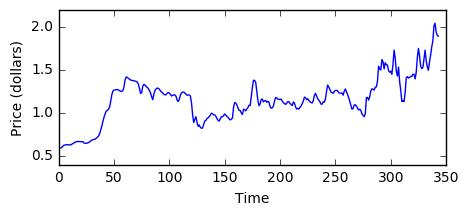

In [69]:
m = prices.as_matrix()           # Let's convert pandas data frame to numpy array
time = np.arange(0, len(m), 1)   # Time axis goes from 0 to len(m) by 1
fig=plt.figure(figsize=(5, 2))   # Prepare a plot 5x2 inches
plt.plot(time, m)                # Plot time vs the prices data
plt.xlabel("Time")               # Always set the axes labels
plt.ylabel("Price (dollars)")
plt.show()                       # Show the actual plot

Sometimes we have a smooth function such as a cosine that we'd like to plot.  To do that, we need to sample the function at regular intervals to collect a list of Y coordinates (like prices from before).  Let's start by defining the function that maps X coordinates to Y values and then get a sample of X values at regular intervals between 0.1 and 1.1, stepping by 0.01:

In [73]:
def f(x):
    return np.cos(3 * np.pi * x) / x

X = np.arange(.1, 1.1, 0.01) # from .1 to 1.1 by step 0.01 

There are three ways to sample the function `f()` at the coordinates contained in X, which I've delineated here. All of these 3 methods employ our Map pattern:

In [78]:
# Get f(x) values for all x in three different ways
# Option 1: (non-Pythonic)
Y = [] 
for x in X:
    Y.append(f(x))

# Option 2: Pythonic way (cool kids do this)
Y = [f(x) for x in X]

# Option 3: Data science way (the most popular kids do this)
Y = f(X)  # a so-called broadcast; implied map

print X
print Y

[ 0.1   0.11  0.12 ...,  1.07  1.08  1.09]
[ 5.87785252  4.62764923  3.54816076 ..., -0.73846263 -0.67497095
 -0.60670813]


Given X and Y coordinates, we can plot the function:

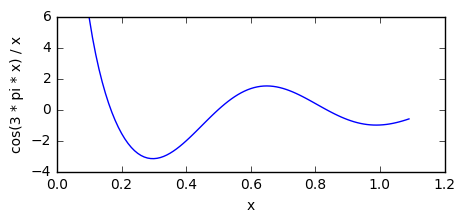

In [71]:
fig=plt.figure(figsize=(5, 2))

plt.plot(X, Y)
plt.xlabel("x")
plt.ylabel("cos(3 * pi * x) / x")
plt.show()

##  Visualizing the relationship between variables

In [47]:
cars = pandas.read_csv('data/cars.csv')
cars

,MPG,CYL,ENG,WGT
0,18.0,8,307.0,3504
1,15.0,8,350.0,3693
...,...,...,...,...
390,28.0,4,120.0,2625
391,31.0,4,119.0,2720


In [9]:
m = cars.as_matrix()
print m

[[   18.     8.   307.  3504.]
 [   15.     8.   350.  3693.]
 [   18.     8.   318.  3436.]
 ..., 
 [   32.     4.   135.  2295.]
 [   28.     4.   120.  2625.]
 [   31.     4.   119.  2720.]]


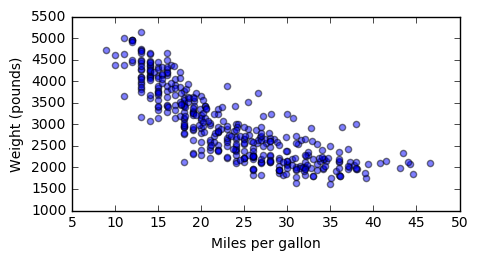

In [10]:
mpg = m[:,0]
wgt = m[:,3]
fig=plt.figure(figsize=(5, 2.5))
plt.scatter(mpg, wgt, alpha=0.5) # looks cooler with alpha (opacity) at 50%
plt.xlabel('Miles per gallon')
plt.ylabel('Weight (pounds)')
plt.show()

If we ever need a unique set, use

## Histograms

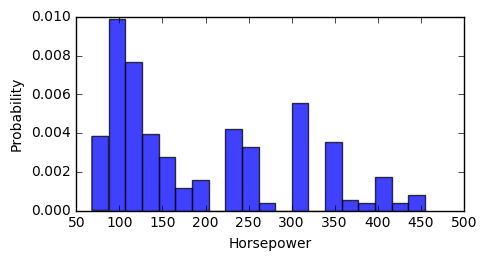

In [11]:
m = cars.as_matrix()
hp = m[:,2]
fig=plt.figure(figsize=(5, 2.5))
n, bins, patches = plt.hist(hp, 20, normed=1, alpha=0.75)
plt.xlabel('Horsepower')
plt.ylabel('Probability')
plt.show()

## Slicing and dicing


**Loading tables**

dataframes

In [50]:
sales = pandas.read_csv('data/sales-small.csv')
sales

,Date,Quantity,Unit Price,Shipping,Customer Name,Product Category,Product Name
0,10/13/10,6,38.94,35.00,Muhammed MacIntyre,Office Supplies,"Eldon Base for stackable storage shelf, platinum"
1,10/1/12,49,208.16,68.02,Barry French,Office Supplies,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera..."
...,...,...,...,...,...,...,...
29,10/21/12,49,6.08,1.17,Grant Carroll,Office Supplies,Col-Erase� Pencils with Erasers
30,1/1/11,10,5.98,4.38,Don Miller,Technology,"Imation 3.5"" DS/HD IBM Formatted Diskettes, 10..."


In [13]:
sales['Date']

0     10/13/10
1      10/1/12
        ...   
29    10/21/12
30      1/1/11
Name: Date, dtype: object

In [14]:
sales['Customer Name']

0     Muhammed MacIntyre
1           Barry French
             ...        
29         Grant Carroll
30            Don Miller
Name: Customer Name, dtype: object

can convert to matrix here we get a list of lists kind of thing

In [52]:
m = sales.as_matrix()
print type(m)
print m.shape
m[0] # get first row

<type 'numpy.ndarray'>
(31, 7)


array(['10/13/10', 6, 38.94, ..., 'Muhammed MacIntyre', 'Office Supplies',
       'Eldon Base for stackable storage shelf, platinum'], dtype=object)

In [16]:
m[:,0] # get first column

array(['10/13/10', '10/1/12', '10/1/12', ..., '11/8/10', '10/21/12',
       '1/1/11'], dtype=object)

In [17]:
m[:,4] # get fifth column

array(['Muhammed MacIntyre', 'Barry French', 'Barry French', ...,
       'Carlos Soltero', 'Grant Carroll', 'Don Miller'], dtype=object)

## Word clouds

tuples
list of tuples
dict

clean out punct, ws, nums, short words. filter out stop words

show unique words with set(words).

Difference between the way things print out and their data type.  list of associations versus dictionary.

Python has a nice library called `wordcloud` we can use. It should already be installed in your Anaconda  Python directory, but if not use the command line:

```bash
$ pip install wordcloud
```

In [18]:
f = open('data/IntroIstanbul.txt')
contents = f.read() # read all content of the file
f.close()
words = contents.split(' ')
print words[:25]

['\n', '', '\n', '', '\n', '', '', '', '\n', '', '', '', '', '', '\n', '', '', '', '', '', '', '', 'The', 'City', 'and']


In [19]:
words = [w for w in words if len(w)>1]
print words[:5]

['The', 'City', 'and', 'ITS', 'People\n']


In [20]:
words = [w.lower() for w in words]
print words[:5]

['the', 'city', 'and', 'its', 'people\n']


In [21]:
words = [w.strip() for w in words]
print words[:5]

['the', 'city', 'and', 'its', 'people']


In [25]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
words = [w for w in words if w not in ENGLISH_STOP_WORDS]
print words[:5]

['city', 'people', 'istanbul', 'worlds', 'venerable']


In [26]:
from collections import Counter # a kind of dict that counts keys
freq = Counter(words)
print "istanbul", freq['istanbul']
print "byzantine", freq['byzantine']
print "the", freq['the']
print freq.most_common(10)

istanbul 6
byzantine 3
the 0
[('city', 8), ('worlds', 6), ('istanbul', 6), ('citys', 5), ('bosphorus', 5), ('ottoman', 4), ('sea', 4), ('important', 4), ('palace,', 3), ('asia', 3)]


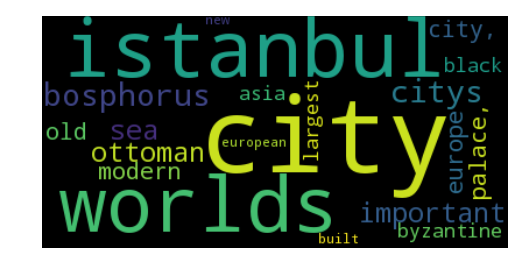

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud()

# get tuples with (word,count) from categories Counter
freq = Counter(words)
wordtuples = freq.most_common(20)
wordcloud.fit_words(dict(wordtuples))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()